In [51]:
# Mohammad Hossein Zehtab
# Machine-Learning-Fridays
# Titanic_Binary_Classification_Project

# Importing Packages

In [118]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Importing Sklearn tools and algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Warning handling
import warnings
warnings.filterwarnings("ignore")

# Reading Titanic Dataset

In [53]:
# Reading titanic's train dataset
titanic_train = pd.read_csv("titanic_train.csv")
titanic_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [54]:
# Reading titanic's test dataset
titanic_test = pd.read_csv("titanic_test.csv")
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
# Copying train and test datasets into 'df0_train' and 'df0_test'
df0_train = titanic_train.copy()
df0_test = titanic_test.copy()

In [57]:
print(f"Titanic train data dimension: {df0_train.shape}")
print(f"Titanic test data dimension: {df0_test.shape}")

Titanic train data dimension: (891, 12)
Titanic test data dimension: (418, 11)


# Titanic Dataset Preproceessing

## Concatenating Train and Test Dataframes for Preprocessing

In [58]:
df0 = pd.concat(objs=[df0_train, df0_test], axis=0, ignore_index=True)
df0.shape

(1309, 12)

In [59]:
df0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


**Note**

After preprocessing, you must split dataframe in a way that train dataset would consist of rows which do not have null values for 'Survived' and the rest rows would belong to test dataset.

## Titanic Dataframe Information

In [60]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


**Insight**
- The dataframe has 1309 samples.
- There are 12 columns in the dataframe in which, one of them is the target ('Survived').
- There is no target data for test dataset ('Survived').
- From the other 11 columns in the dataframe, only 8 columns are informative for the process. Also 'Cabin' column should not be considered because it has too much NaN values. So there are the 7 features that we need. ('PassengerId', 'Name', 'Ticket' and 'Cabin' should be dropped)
- The Dataframe has missing values in 'Age', 'Embarked' and 'Fare' features that needs to be handled.
- Encoding is also necessary for 'Pclass', 'Sex' and 'Embarked' features.
- Because of various data range for 'Age' and 'Fare' features, data scaling should be done.

In [61]:
df0.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
855,856,1.0,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
65,66,1.0,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
698,699,0.0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
319,320,1.0,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5000,E34,C
848,849,0.0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,NaN,S


## Dropping Uninformative Columns

In [62]:
# Dropping 'PassengerId', 'Name', 'Ticket' and 'Cabin' columns
df1 = df0.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


## Handling Missing Values

In [63]:
# Total sum of missing values
df1.iloc[:, 1:].isnull().sum().sum()

266

In [64]:
# Filling missing values of 'Age' with mean strategy
df2 = df1.copy()
df2["Age"].fillna(value=df2["Age"].mean(axis=0), inplace=True)

In [65]:
# Checking if filling missing values of 'Age' is done correctly
mask = df1.iloc[:, 1:].isnull().any(axis=1)
df1.iloc[:, 1:].query("@mask == True")

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,3,male,NaN,0,0,8.4583,Q
17,2,male,NaN,0,0,13.0000,S
19,3,female,NaN,0,0,7.2250,C
26,3,male,NaN,0,0,7.2250,C
28,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...
1299,3,female,NaN,0,0,7.7208,Q
1301,3,female,NaN,0,0,7.7500,Q
1304,3,male,NaN,0,0,8.0500,S
1307,3,male,NaN,0,0,8.0500,S


In [66]:
# Checking if filling missing values of 'Age' is done correctly
df2.iloc[1301]

Survived          NaN
Pclass              3
Sex            female
Age         29.881138
SibSp               0
Parch               0
Fare             7.75
Embarked            Q
Name: 1301, dtype: object

In [67]:
# Filling missing values of 'Embarked' with mode stragtegy
df3 = df2.copy()
df3["Embarked"].fillna(value=df3["Embarked"].mode()[0], inplace=True)

In [68]:
# Checking if filling missing values of 'Embarked' is done correctly
mask = df2.iloc[:, 1:].isnull().any(axis=1)
df2.iloc[:, 1:].query("@mask == True")

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,female,38.0,0,0,80.0,NaN
829,1,female,62.0,0,0,80.0,NaN
1043,3,male,60.5,0,0,NaN,S


In [69]:
# Checking if filling missing values of 'Embarked' is done correctly
df3.iloc[61], df3.iloc[829]

(Survived       1.0
 Pclass           1
 Sex         female
 Age           38.0
 SibSp            0
 Parch            0
 Fare          80.0
 Embarked         S
 Name: 61, dtype: object,
 Survived       1.0
 Pclass           1
 Sex         female
 Age           62.0
 SibSp            0
 Parch            0
 Fare          80.0
 Embarked         S
 Name: 829, dtype: object)

In [70]:
# Filling missing values of 'Fare' with mean strategy
df4 = df3.copy()
df4["Fare"].fillna(value=df4["Fare"].mean(axis=0), inplace=True)

In [71]:
# Checking if filling missing values of 'Fare' is done correctly
df4.iloc[1043]

Survived          NaN
Pclass              3
Sex              male
Age              60.5
SibSp               0
Parch               0
Fare        33.295479
Embarked            S
Name: 1043, dtype: object

In [72]:
# Total number of missing values after handling
df4.iloc[:, 1:].isnull().sum().sum()

0

## Handling Duplicated Rows

In [73]:
# Total number of duplicated rows
df4.duplicated().sum()

149

In [74]:
df5 = df4.drop_duplicates()
df5.shape

(1160, 8)

## Encoding Non Numeric Features

In [75]:
# One hot encoding of 'Pclass'
df6 = pd.get_dummies(data=df5, columns=["Pclass"], drop_first=True, dtype=int)
df6.sample(5)

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_2,Pclass_3
344,0.0,male,36.0,0,0,13.0000,S,1,0
169,0.0,male,28.0,0,0,56.4958,S,0,1
883,0.0,male,28.0,0,0,10.5000,S,1,0
1063,NaN,male,23.0,1,0,13.9000,S,0,1
336,0.0,male,29.0,1,0,66.6000,S,0,0


In [76]:
# One hot encoding of 'Sex'
df7 = pd.get_dummies(data=df6, columns=["Sex"], drop_first=True, dtype=int)
df7.head()

,Survived,Age,SibSp,Parch,Fare,Embarked,Pclass_2,Pclass_3,Sex_male
0,0.0,22.0,1,0,7.2500,S,0,1,1
1,1.0,38.0,1,0,71.2833,C,0,0,0
2,1.0,26.0,0,0,7.9250,S,0,1,0
3,1.0,35.0,1,0,53.1000,S,0,0,0
4,0.0,35.0,0,0,8.0500,S,0,1,1


In [77]:
# One hot encoding of 'Embarked'
df8 = pd.get_dummies(data=df7, columns=["Embarked"], drop_first=True, dtype=int)
df8.tail()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
1302,NaN,37.000000,1,0,90.0000,0,0,0,1,0
1303,NaN,28.000000,0,0,7.7750,0,1,0,0,1
1305,NaN,39.000000,0,0,108.9000,0,0,0,0,0
1306,NaN,38.500000,0,0,7.2500,0,1,1,0,1
1308,NaN,29.881138,1,1,22.3583,0,1,1,0,0


## Handling Outliers

### Plotting Box Plots

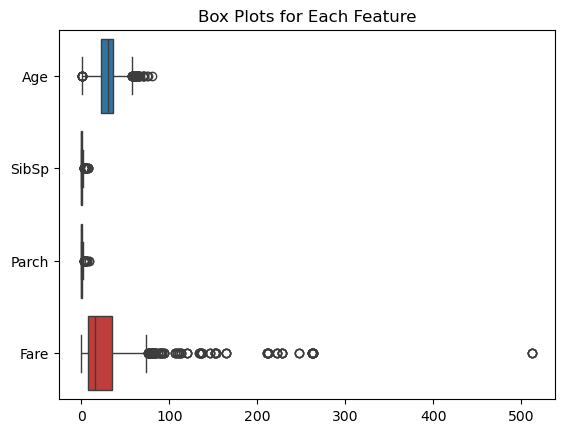

In [78]:
# Box plots for each feature as a general view
plt.title("Box Plots for Each Feature")
sns.boxplot(data=df8.iloc[:, 1:5], orient="h")
plt.show()

**Note**

Since the features of 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q' and 'Embarked_S' have binary values, outllier detection is not necessary for them.

### Outlier Detection Using Zscore

In [79]:
# Turning feature values into zscore values
zscores = [stats.zscore(df8[feature]) for feature in df8.columns[1:5]]
len(zscores), type(zscores)

(4, list)

In [80]:
df8.columns.tolist()

['Survived',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Pclass_2',
 'Pclass_3',
 'Sex_male',
 'Embarked_Q',
 'Embarked_S']

In [81]:
# Outliers for each feature using zscore
zscore_Age = df8[np.abs(zscores[0]) > 3]
zscore_SibSp = df8[np.abs(zscores[1]) > 3]
zscore_Parch = df8[np.abs(zscores[2]) > 3]
zscore_Fare = df8[np.abs(zscores[3]) > 3]
outlier_indices_using_zscore = pd.concat([zscore_Age, zscore_SibSp, zscore_Parch, zscore_Fare], axis=0)
outlier_indices_using_zscore.shape

(91, 10)

### Outlier Detection Using 3*Sigma Based on Normal Distribution

In [82]:
# Outlier indices using 3*sigma based on normal distribution
def find_outlier_index_using_3sigma(dataframe) -> list:
    '''
    Finding outlier indices using 3*sigma based on normal distribution.
    '''
    features = df8.columns[1:5].tolist()
    labels = df8["Survived"].unique().tolist()

    outlier_index_3sigma = list()
    for feature in features:
        for label in labels:
            df_Survived = dataframe.query("Survived == @label")
            selected_column = df_Survived[feature]
            
            mu = selected_column.mean()
            sigma = selected_column.std()
            lower_limit = mu - 3 * sigma
            upper_limit = mu + 3 * sigma
            
            mask = (selected_column < lower_limit)|(selected_column > upper_limit)
            outliers = selected_column[mask]
            outlier_indices = outliers.index
            # print(outlier_indices)    Debugging
            
            if len(outlier_indices) == 0: continue
            # print(f"{feature:15},\t{label:15},\t outlier indices={outlier_indices.values}")    #Debugging
            outlier_index_3sigma.extend(outlier_indices)
            
    return outlier_index_3sigma

### Driver Code ###
outlier_indices_using_3sigma = find_outlier_index_using_3sigma(df8)
print("\nNumber of outlier indices using 3sigma:", len(outlier_indices_using_3sigma))


Number of outlier indices using 3sigma: 65


### Outlier Detection Using IQR

In [83]:
# Outlier indices using iqr
def find_outlier_index_using_iqr(dataframe) -> list:
    '''
    Finding outlier indices using iqr.
    '''
    features = df8.columns[1:5].tolist()
    labels = df8["Survived"].unique().tolist()

    outlier_index_iqr = list()
    for feature in features:
        for label in labels:
            df_Survived = dataframe.query("Survived == @label")
            selected_column = df_Survived[feature]
            
            q1 = selected_column.quantile(0.25)    # First quartile
            q3 = selected_column.quantile(0.75)    # Third quartile
            iqr = q3 - q1
            lower_limit = q1 - 1.5 * iqr
            upper_limit = q3 + 1.5 * iqr
            
            mask = (selected_column < lower_limit)|(selected_column > upper_limit)
            outliers = selected_column[mask]
            outlier_indices = outliers.index
            
            if len(outlier_indices) == 0: continue
            # print(f"{feature:15},\t{label:15},\t outlier indices={outlier_indices.values}")    #Debugging
            outlier_index_iqr.extend(outlier_indices)
            
    return outlier_index_iqr

### Driver Code ###
outlier_indices_using_iqr = find_outlier_index_using_iqr(df8)
print("\nNumber of outlier indices using iqr:", len(outlier_indices_using_iqr))


Number of outlier indices using iqr: 225


### Dropping Common Outliers

In [84]:
# Turning outlier list into set and obtaining intersection of the sets
final_outlier_indices = set(outlier_indices_using_zscore.index) & set(outlier_indices_using_3sigma) & set(outlier_indices_using_iqr)
print("Number of final outlier indices: ", len(final_outlier_indices))

Number of final outlier indices:  51


In [85]:
# Dropping Outliers
df9 = df8.drop(index=final_outlier_indices)
df9.shape

(1109, 10)

## Scaling Data

In [86]:
df9.sample(10)

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
221,0.0,27.000000,0,0,13.0000,1,0,1,0,1
414,1.0,44.000000,0,0,7.9250,0,1,1,0,1
1215,NaN,39.000000,0,0,211.3375,0,0,0,0,1
234,0.0,24.000000,0,0,10.5000,1,0,1,0,1
833,0.0,23.000000,0,0,7.8542,0,1,1,0,1
917,NaN,22.000000,0,1,61.9792,0,0,0,0,0
186,1.0,29.881138,1,0,15.5000,0,1,0,1,0
897,NaN,30.000000,0,0,7.6292,0,1,0,1,0
1070,NaN,64.000000,0,2,83.1583,0,0,0,0,0
1295,NaN,43.000000,1,0,27.7208,0,0,1,0,0


**Note**

Since the features of 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q' and 'Embarked_S' have binary values, scaling is not necessary for them.

In [88]:
# Scaling the four first features ('Age', 'SibSp', 'Parch' and 'Fare') using 'StandardScaler'
df10 = df9.copy()
standard_scaler = StandardScaler()
scaling_feature_column_list = df10.columns[1:5].tolist()
scaled_array = standard_scaler.fit_transform(df10[scaling_feature_column_list])
df10[scaling_feature_column_list] = scaled_array
df10.tail()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
1302,NaN,0.519502,0.784408,-0.443468,1.271899,0,0,0,1,0
1303,NaN,-0.167558,-0.558043,-0.443468,-0.553786,0,1,0,0,1
1305,NaN,0.672182,-0.558043,-0.443468,1.691546,0,0,0,0,0
1306,NaN,0.634012,-0.558043,-0.443468,-0.565443,0,1,1,0,1
1308,NaN,-0.023952,0.784408,0.824073,-0.229986,0,1,1,0,0


# Creating Binary Classification Model Using Logistic Regression

## Spliting Data into Train and Test Datasets

In [115]:
# Copying the last dataframe into 'df_clean'
df_clean = df10.copy()
df_clean.shape

(1109, 10)

In [114]:
# Spliting Data to train and test dataframes
mask = df_clean.isnull().any(axis=1)
df_clean_train = df_clean.query("@mask == False")
df_clean_test = df_clean.query("@mask == True")
print("Dimension of Clean Train Dataframe: ", df_clean_train.shape)
print("Dimension of Clean Test Dataframe: ", df_clean_test.shape)

Dimension of Clean Train Dataframe:  (729, 10)
Dimension of Clean Test Dataframe:  (380, 10)


In [116]:
# Creating feature matrices of X_train and X_test, and target vector of y_train
X_train = df_clean_train.drop(columns="Survived")
X_test = df_clean_test.drop(columns="Survived")
y_train = df_clean_train["Survived"]
print("X_train Dimension = ", X_train.shape)
print("X_test Dimension = ", X_test.shape)
print("y_train Dimension = ", y_train.shape)

X_train Dimension =  (729, 9)
X_test Dimension =  (380, 9)
y_train Dimension =  (729,)


In [117]:
# Converting X_train, X_test and y_train to numpy array for easier computations
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()

## Building Binary Logistic Regression Model

In [119]:
# Creating logistic regression object
logistic_regression = LogisticRegression()

In [120]:
# Fitting logistic regression object on train dataset
logistic_regression.fit(X_train, y_train)

LogisticRegression()

# Prediction of Test Data

In [121]:
# Predicting of test data
y_pred = logistic_regression.predict(X_test)
y_pred

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0.

In [127]:
# Assigning predicted target to not-scaled dataframe of 'df9_test'
mask = df9.isnull().any(axis=1)
df9_test = df9.query("@mask == True")
df9_test.assign(Survived_Prediction = y_pred)

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Survived_Prediction
891,NaN,34.500000,0,0,7.8292,0,1,1,1,0,0.0
892,NaN,47.000000,1,0,7.0000,0,1,0,0,1,0.0
893,NaN,62.000000,0,0,9.6875,1,0,1,1,0,0.0
894,NaN,27.000000,0,0,8.6625,0,1,1,0,1,0.0
895,NaN,22.000000,1,1,12.2875,0,1,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1302,NaN,37.000000,1,0,90.0000,0,0,0,1,0,1.0
1303,NaN,28.000000,0,0,7.7750,0,1,0,0,1,1.0
1305,NaN,39.000000,0,0,108.9000,0,0,0,0,0,1.0
1306,NaN,38.500000,0,0,7.2500,0,1,1,0,1,0.0


# Accuracy Score of Train Dataset

In [123]:
# Accuracy score of train dataset
print(f"Train Dataset Accuracy is: {logistic_regression.score(X_train, y_train) * 100:.2f} %")

Train Dataset Accuracy is: 77.64 %


# Final Conclusion

The created model is good-fitted with the accuracy score of 78% for the train data (As test dataset is unsupervized, we can not calculate accuracy score for it). So the binary logistic regression classification model works PERFECTLY!